# Classification

## Exercise 1: Work with MNIST

- Create ml model to achieve 97% of accuracy with test datasets
  - Try KNeighborClassifier and other models as well
  - Find 

In [42]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [43]:
import numpy as np

x = mnist.data
y = mnist.target
print(x.shape)
print(y.shape)
print(np.sqrt(x.shape[1]))


(70000, 784)
(70000,)
28.0


In [44]:
# already splited into train and test datasets
# 最初の6万万画像: training dataset
# 最後の1万万画像: validation dataset

x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

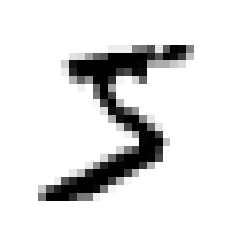

In [45]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 

some_digit = x[0]
some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap="binary")
plt.axis("off")
plt.show()

### Create ML Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

tune_params = {'n_neighbors': [3, 10, 50], 'weights': ['uniform', 'distance']}
knn_clf = KNeighborsClassifier()
# knn_clf.fit(x_train, y_train)
# x_test_pred = knn_clf.predict(x_test)
grid_search = GridSearchCV(knn_clf, tune_params, cv=5, verbose=3)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  40.6s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  35.2s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  35.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  35.2s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  35.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  34.9s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  34.8s
[CV 1/5] END ...n_neighbors=10, weights=uniform;, score=0.965 total time=  39.0s
[CV 2/5] END ...n_neighbors=10, weights=uniform;,

### Evaluate ML model

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(x_test)
print(accuracy_score(y_test, y_test_pred))

0.9717


## Exercise 2: Training Set Expansion

1. MNIST画像を任意の方向(上下左右)に1ピクセルずつずらす関数を書く
2. 訓練セットの全ての画像について、4方向に1ピクセルずつずらした4つのコピーを作る
3. それを訓練セットに追加する
4. この拡張訓練セットを利用して最良のモデルを訓練し、訓練セットに対する適合率を測定


### Shift image's place

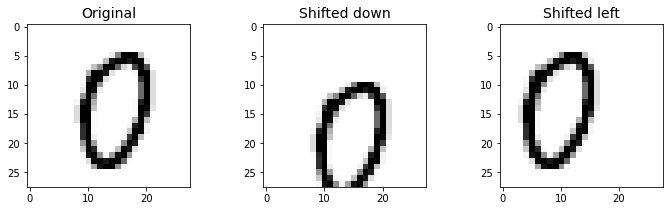

In [83]:
import numpy as np
from scipy.ndimage.interpolation import shift

def shift_image(image, dy, dx):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

def create_shifted_images(images, dy, dx):
    for i, image in enumerate(images):
        images[i] = shift_image(image, dy, dx)
    return images

image = x_train[1000]
shifted_image_down = shift_image(image, 5, 0)
shifted_image_left = shift_image(image, 0, -5)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()


In [ ]:
# Trial code
sample = np.array([[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1]])
print(sample.shape)
add = np.array([[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1]])
added = np.append(sample, add, axis=0)
print(added.shape)

In [109]:
import pandas as pd
import numpy as np

x_train_expand = x_train.copy()
y_train_expand = y_train.copy()

for d in [[5, 0], [-5, 0], [0, 5], [0, -5]]:
    """ Down, Up, Right, Left """
    temp_img = x_train.copy()
    new_training_dataset = create_shifted_images(temp_img, d[0], d[1])
    # x_train_expand.append(new_training_dataset)
    # y_train_expand.append(y_train.copy())
    x_train_expand = np.append(x_train_expand, new_training_dataset, axis=0)
    y_train_expand = np.append(y_train_expand, y_train.copy(), axis=0)

print(x_train_expand.shape)
print(y_train_expand.shape)
print(x_test.shape)
print(y_test.shape)

(300000, 784)
(300000,)
(10000, 784)
(10000,)


### Work with KNN model again

In [ ]:
tune_params = {'n_neighbors': [3, 10, 50], 'weights': ['uniform', 'distance']}

# grid_search = GridSearchCV(knn_clf, tune_params, cv=5, verbose=3)
# grid_search.fit(x_train_expand, y_train_expand)
knn_clf = KNeighborsClassifier(**grid_search.best_estimator_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.173 total time=15.9min
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.166 total time=15.8min
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.140 total time=15.7min
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.140 total time=15.7min
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.148 total time=15.7min
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.176 total time=15.7min
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.172 total time=15.6min
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.141 total time=15.6min
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.152 total time=15.6min
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.153 total time=15.5min
[CV 1/5] END ...n_neighbors=10, weights=uniform;, score=0.164 total time=16.9min
[CV 2/5] END ...n_neighbors=10, weights=uniform;,

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(x_test)
print(accuracy_score(y_test, y_test_pred))

## Exercise 3: Try with Taitanic
[Taitanic Datasets](https://www.kaggle.com/datasets/benjamin1717/taitanic)
